## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
(X_train,y_train),(X_test,y_test)=mnist.load_data()

**What is the no. of elements in the training and testing datasets?**

In [3]:
#ENTER YOUR CODE HERE
print("Trained on:", X_train.shape[0])
print("Tested on:", X_test.shape[0])

Trained on: 60000
Tested on: 10000


**What are the labels in the dataset?**

In [4]:
#ENTER YOUR CODE HERE
print("Training dataset labels:", y_train[:10])
print("Testing dataset labels:", y_test[:10])

Training dataset labels: [5 0 4 1 9 2 1 3 1 4]
Testing dataset labels: [7 2 1 0 4 1 4 9 5 9]


**Visualise one image for each label.**

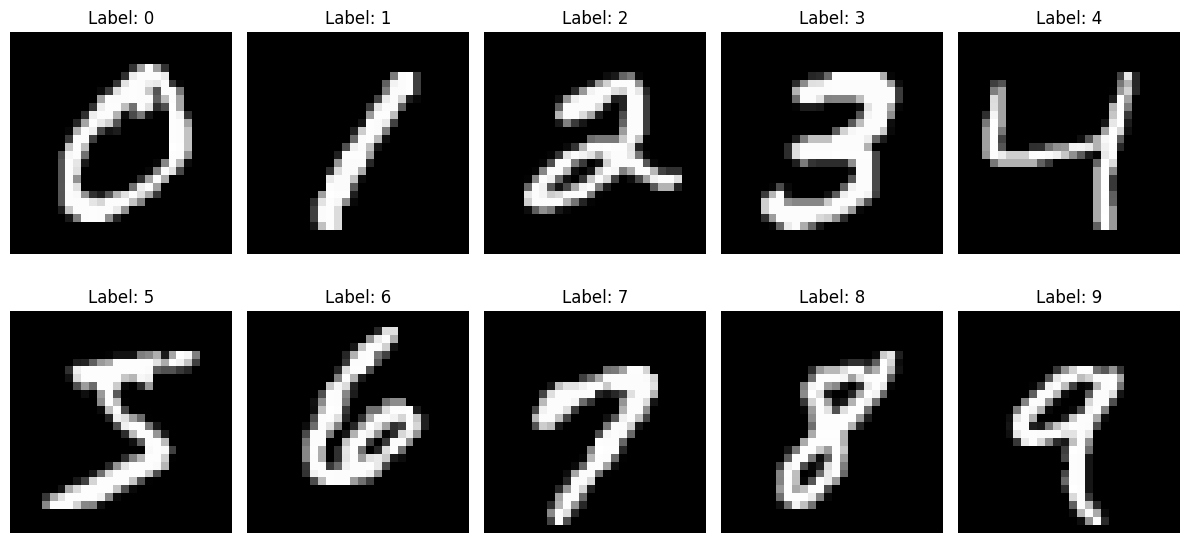

In [7]:
#ENTER YOUR CODE HERE
fig, axes = plt.subplots(2, 5, figsize=(12, 6))


for i in range(10):

    index = np.where(y_train == i)[0][0]


    ax = axes[i // 5, i % 5]
    ax.imshow(X_train[index], cmap='gray')
    ax.set_title(f'Label: {i}')
    ax.axis('off')


plt.tight_layout()
plt.show()

**One-hot encode the y labels.**

In [12]:
#ENTER YOUR CODE HERE
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

print("Training dataset (first 5):")
print(y_train_one_hot[:5])

print("Testing dataset (first 5):")
print(y_test_one_hot[:5])

Training dataset (first 5):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Testing dataset (first 5):
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

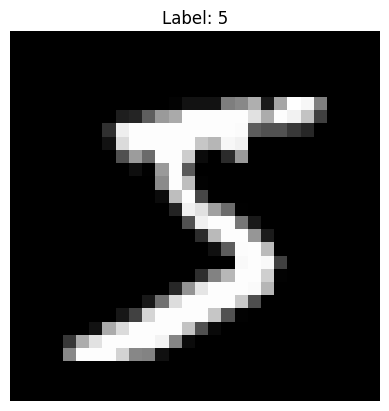

In [13]:
#ENTER YOUR CODE HERE
image_pixels = X_train[0]

print(image_pixels)

plt.imshow(image_pixels, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [18]:
#ENTER YOUR CODE HERE

X_train_reshaped = X_train.reshape((60000, 28, 28, 1))
X_test_reshaped = X_test.reshape((10000, 28, 28, 1))



**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [20]:
#ENTER YOUR CODE HERE
X_train_normalized = X_train_reshaped.astype('float32') / 255.0
X_test_normalized = X_test_reshaped.astype('float32') / 255.0


**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [24]:
model = tf.keras.models.Sequential()

# ENTER YOUR CODE HERE
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [25]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Fit the model and plot the training history.**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8958 - loss: 1.5311 - val_accuracy: 0.9660 - val_loss: 0.1061
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9820 - loss: 0.0579 - val_accuracy: 0.9681 - val_loss: 0.1094
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9838 - val_loss: 0.0589
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9786 - val_loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9896 - loss: 0.0325 - val_accuracy: 0.9860 - val_loss: 0.0480
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9875 - val_loss: 0.0492
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9850 - val_loss: 0.0695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9938 -

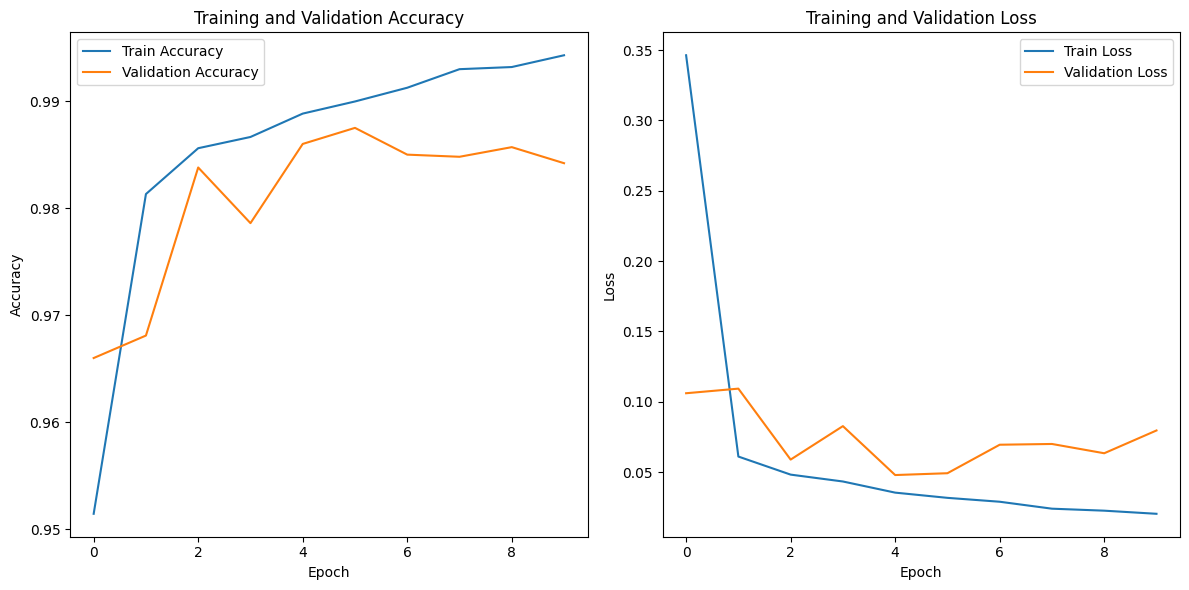

In [26]:
#ENTER YOUR CODE HERE
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Plotting the training history

# Accuracy plot
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

**Now test your model on the training dataset and print the classification matrix.**

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


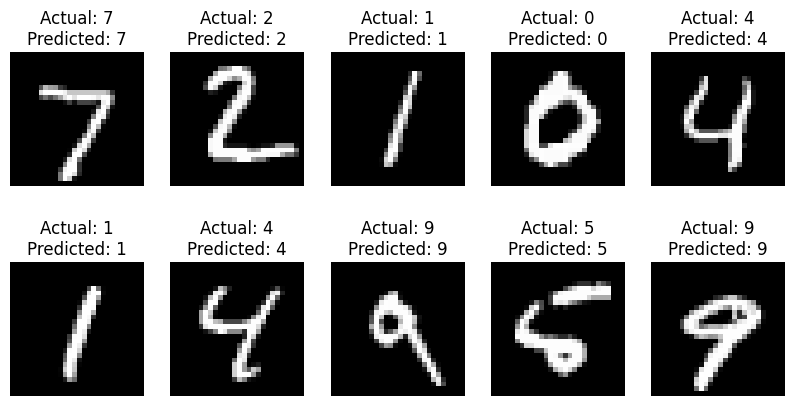

In [28]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')